In [117]:
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
run  /Users/adrianovaldesgomez/Repos/PhD-Thesis/py/phd_python_documented_code.py

In [4]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming'

In [5]:
mkdir Single_Particle_Sim

In [436]:
cd Single_Particle_Sim/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim


In [437]:
mkdir Y30_Sim_dt1e-3_southpole

In [438]:
cd Y20_Sim_dt1e-3_southpole/

[Errno 2] No such file or directory: 'Y20_Sim_dt1e-3_southpole/'
/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim


In [439]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim'

In [443]:
ls

Y20_Sim_dt1e-1/           Y20_Sim_dt1e-2/           Y20_Sim_dt1e-3/
Y20_Sim_dt1e-1_southpole/ Y20_Sim_dt1e-2_southpole/ Y30_Sim_dt1e-3_southpole/


In [444]:
cd Y30_Sim_dt1e-3_southpole/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/Y30_Sim_dt1e-3_southpole


In [442]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim




10000 particles simulated 10000 monte carlo steps took 23468.98476600647 seconds ( approximately 6.5 hours)


In [7]:
23468.98476600647/3600

6.519162435001797

In [91]:
polo_n?

In [397]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/Y20_Sim'

In [463]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e6


In [464]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e6'

In [465]:
ls

dte-3/


In [534]:
mkdir MC1e7

In [535]:
cd MC1e7/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7


In [562]:
mkdir dte-1

In [563]:
cd dte-1/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1


In [569]:
mkdir der

In [570]:
cd der/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1/der


In [760]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1


In [749]:
ls

MC1e5/                    Y20_Sim_dt1e-1/           Y20_Sim_dt1e-2_southpole/
MC1e6/                    Y20_Sim_dt1e-1_southpole/ Y20_Sim_dt1e-3/
MC1e7/                    Y20_Sim_dt1e-2/           Y30_Sim_dt1e-3_southpole/


In [750]:
cd MC1e7/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7


In [675]:
ls

dte-1/ dte-2/ dte-3/


In [752]:
cd dte-1

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1


In [761]:
cd der/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1/der


In [769]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1/der'

In [770]:
#Vamos a usar esta plantilla para calcular el desplasamiento medio cuadratico
#en el caso de un campo externo con cuatro puntos criticos
#el ensamble parte del polo norte explotando la simetria del problema

start_time = time.time()
#Parametros de la simulacion
D = 1e-1
dt = np.log(2)*1e-1
v0 = 5.0*np.sqrt(2*D)*dt
#v0 = 0.

#dist_uni = polo_n(10000,1.)

N_ens = 1

#dist_uni = obs_uniforme(N_ens, 1., 0)
#dist_uni = polo_n(N_ens,1)
dist_uni = polo_s(N_ens)


MC_steps = 10000000


#plot_potential(dist_uni,0,0,0)
rs = dist_uni

l_rs = [rs]


#Variables iniciales para el analisis estadistico

ht0, mt0, vt0 = mean_var_hist_theta(rs)


#hp0, mp0, vp0 = mean_var_hist_phis(rs)
mean_thetas_t = [mt0]
var_thetas_t = [vt0]
#mean_phis_t = [mp0]
#var_phis_t = [vp0]


histograma_thetas_t = [ht0]


#histograma_phis_t = [hp0]


for i in range(MC_steps):
         
        nuevas_pos = act_n_field(rs, v0, field_y20, D, dt)
        #plot_potential(nuevas_pos, 0, 0, i + 1)
        rs = nuevas_pos
        l_rs.append(rs)
        
        ht, mt, vt = mean_var_hist_theta(rs)
        
        #hp, mp, vp = mean_var_hist_phis(rs)
        
        histograma_thetas_t.append(ht)
        
        #histograma_phis_t.append(hp)
        
        mean_thetas_t.append(mt)
        var_thetas_t.append(vt)
        #mean_phis_t.append(mp)
        #var_phis_t.append(vp)
        
        
array_pos_t = np.array(l_rs)
    
with h5py.File('pos_array.h5', 'w') as hf:
            hf.create_dataset("pos-ds_D_{}_Odt_{}_N_{}_MC_S_{}".format(D,'-3',N_ens, MC_steps),  data=array_pos_t)
      


    
    
np.savetxt("Y20UD_Hist_Theta_t.txt", histograma_thetas_t)


#np.savetxt("Dpole_North_ini_dist_Hist_Phi_t2.txt", histograma_phis_t)
np.savetxt("Y20_Mean_Theta_t2.txt", mean_thetas_t)
#np.savetxt("Dpole_North_ini_dist_Mean_phi_t2.txt", mean_phis_t)
np.savetxt("Y20_Var_Theta_t2.txt", var_thetas_t)
#np.savetxt("Dpole_North_ini_dist_Var_Phi_t2.txt", var_phis_t)
#np.savetxt("Dpole_North_ini_dist_Mean_Theta_t2.txt", mean_thetas_t)


#df_rs = pd.DataFrame(l_rs)
#df_rs.to_csv("l_rs.csv", index=False, header=False)


print("--- %s seconds ---" % (time.time() - start_time))

--- 1632.5908420085907 seconds ---


In [704]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e6/dte-2/der'

In [703]:
ls -ls

total 194360
49160 -rw-r--r--  1 adrianovaldesgomez  staff  25000025 May  3 15:15 Y20UD_Hist_Theta_t.txt
49160 -rw-r--r--  1 adrianovaldesgomez  staff  25000025 May  3 15:15 Y20_Mean_Theta_t2.txt
49160 -rw-r--r--  1 adrianovaldesgomez  staff  25000025 May  3 15:15 Y20_Var_Theta_t2.txt
46880 -rw-r--r--  1 adrianovaldesgomez  staff  24002072 May  3 15:15 pos_array.h5


In [94]:
v0

0.0015499242141443585

## EDA

In [95]:
suma = 0
tiempos = []
for i in range(len(l_rs)):
    tiempos.append(suma)
    suma += dt
tiempos = np.array(tiempos)

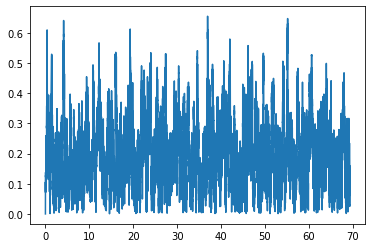

In [96]:
plt.plot(tiempos, mean_thetas_t)

In [70]:
import pandas as pd

In [97]:
mi_dict = {'tiempo': tiempos, 'theta': mean_thetas_t}


In [98]:
df = pd.DataFrame.from_dict(mi_dict)

In [99]:
df.head()

,tiempo,theta
0,0.000000,0.000000
1,0.000693,0.015228
2,0.001386,0.018477
3,0.002079,0.014993
4,0.002773,0.022262


In [100]:
df.set_index('tiempo', inplace=True)

In [101]:
df.head()

,theta
tiempo,
0.000000,0.000000
0.000693,0.015228
0.001386,0.018477
0.002079,0.014993
0.002773,0.022262


<AxesSubplot:xlabel='tiempo'>

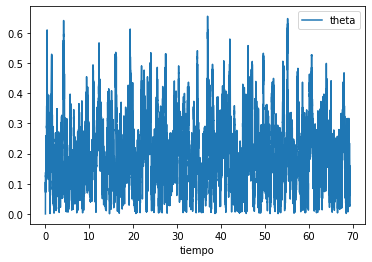

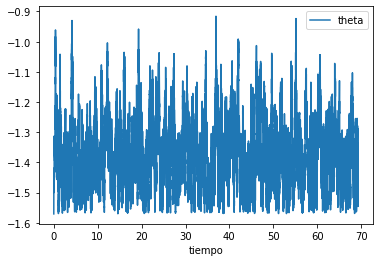

In [102]:
df.plot()
(df - np.pi/2).plot()

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
df1 = df[:10000]

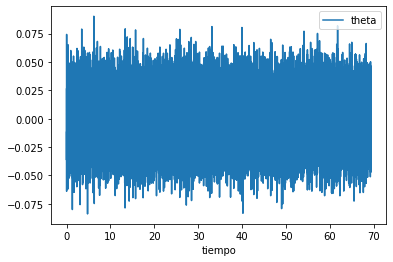

ADF Statistic: -17.10287291332383
p-value: 7.456131051399496e-30


In [105]:
# Calculate the second difference of the time series
df_stationary = df1.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(df1['theta'])

# Plot the differenced time series
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [62]:
df.resample?

In [106]:
df.theta.mean()

0.2002516588072753

In [107]:
np.pi/2

1.5707963267948966

In [108]:
df.theta.var()**(1/2)

0.10777019053206133

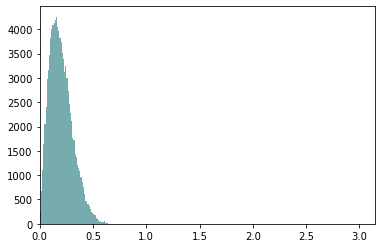

In [113]:
plt.hist(df.theta, bins=60, color='cadetblue', alpha=0.85)
plt.xlim(0,np.pi);

In [89]:
df_right = df.copy()

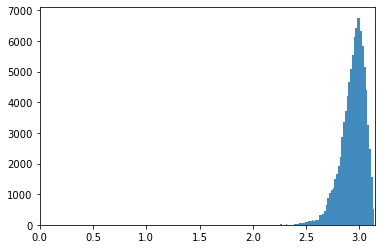

In [114]:
plt.hist(df_right.theta, bins=60, alpha=.85)
plt.xlim(0,np.pi);

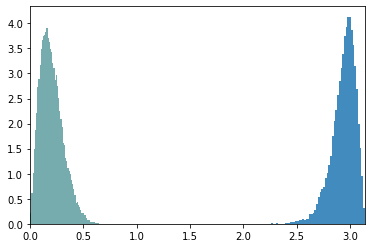

In [116]:
plt.hist(df.theta, bins=60, color='cadetblue', alpha=0.85, density=True)
plt.hist(df_right.theta, bins=60, alpha=.85, density=True)
plt.xlim(0,np.pi);

In [ ]:
def Simulation_One_particle(D,dt,v0, N_ens, M_steps):

    #Vamos a usar esta plantilla para calcular el desplasamiento medio cuadratico
    #en el caso de un campo externo con cuatro puntos criticos
    #el ensamble parte del polo norte explotando la simetria del problema

    start_time = time.time()
    #Parametros de la simulacion
    D = 1e-1
    dt = np.log(2)*1e-3
    v0 = 5.0*np.sqrt(2*D)*dt
    #v0 = 0.

    #dist_uni = polo_n(10000,1.)

    N_ens = 1

    dist_uni = obs_uniforme(N_ens, 1., 0)


    MC_steps = 100000


    #plot_potential(dist_uni,0,0,0)
    rs = dist_uni

    l_rs = [rs]


    #Variables iniciales para el analisis estadistico

    ht0, mt0, vt0 = mean_var_hist_theta(rs)


    mean_thetas_t = [mt0]
    var_thetas_t = [vt0]


    histograma_thetas_t = [ht0]


    #histograma_phis_t = [hp0]


    for i in range(MC_steps):

            nuevas_pos = act_n_field(rs, v0, field_y20, D, dt)
            #plot_potential(nuevas_pos, 0, 0, i + 1)
            rs = nuevas_pos
            l_rs.append(rs)

            ht, mt, vt = mean_var_hist_theta(rs)

            #hp, mp, vp = mean_var_hist_phis(rs)

            histograma_thetas_t.append(ht)

            #histograma_phis_t.append(hp)

            mean_thetas_t.append(mt)
            var_thetas_t.append(vt)
            #mean_phis_t.append(mp)
            #var_phis_t.append(vp)


    array_pos_t = np.array(l_rs)

    with h5py.File('pos_array.h5', 'w') as hf:
                hf.create_dataset("pos-ds_D_{}_Odt_{}_N_{}_MC_S_{}".format(D,'-3',N_ens, MC_steps),  data=array_pos_t)





    np.savetxt("Y20UD_Hist_Theta_t.txt", histograma_thetas_t)


    np.savetxt("Y20_Mean_Theta_t2.txt", mean_thetas_t)

    np.savetxt("Y20_Var_Theta_t2.txt", var_thetas_t)



    #df_rs = pd.DataFrame(l_rs)
    #df_rs.to_csv("l_rs.csv", index=False, header=False)


    print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
def thetas_phis_ensemble(l_pos_t):
    """This function returns two lists of the ensemble of angular coordinates 
    given a list of position vactors"""

    thetas_ensamble = []
    phis_ensamble = []
    for l_pos in l_pos_t:
        thetas = []
        phis = []
        for pos in l_pos:
            r, theta, phi = trans_c_s(pos[0],pos[1],pos[2])
            thetas.append(theta)
            phis.append(phi)

        thetas_ensamble.append(thetas)
        phis_ensamble.append(phis)
    return thetas_ensamble, phis_ensamble


In [ ]:
def time_array(MC_steps, dt):
    tiempos = [0]
    suma = 0
    for i in range(MC_steps):
        suma += dt
        tiempos.append(suma)
    return np.array(tiempos)

In [119]:
thetas = np.linspace(0,np.pi,1000000)
phis = np.linspace(0,2*np.pi,2000000)

In [122]:
cy20 = -np.sqrt((5./(16*np.pi)))
def Y20(theta,N,u0_gamma):
    return np.exp(- u0_gamma * cy20 * (3 * np.cos(theta)**2 - 1)) * np.sin(theta) / N

In [123]:
NY20 = integrate.simps(Y20(thetas,1., 5.0*np.sqrt(2*D)/D), thetas)


In [151]:
region = np.linspace(2.5,np.pi,1000)

In [153]:
NY20_right = integrate.simps(Y20(region, 1., 5.0*np.sqrt(2*D)/D), region)


In [154]:
PY20_right = Y20(region, NY20_right, 5.0*np.sqrt(2*D)/D)

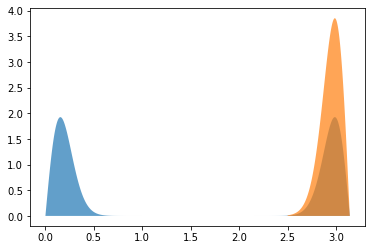

In [156]:
plt.fill_between(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=0.7)
plt.fill_between(region, Y20(region, NY20_right, 5.0*np.sqrt(2*D)/D), alpha=0.7);

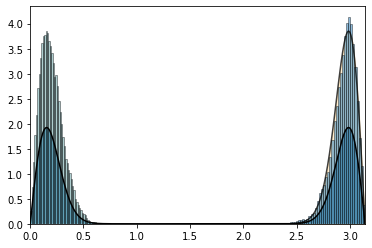

In [162]:
plt.fill_between(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=0.7)
plt.plot(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=1.0, color='k')
plt.hist(df.theta, bins=50, color='cadetblue', alpha=0.5, density=True, edgecolor='k', linewidth=.75)
plt.hist(df_right.theta, bins=50, alpha=.5, density=True, edgecolor='k', linewidth=.75)
plt.fill_between(region, Y20(region, NY20_right, 5.0*np.sqrt(2*D)/D), alpha=0.17, color='orange')
plt.plot(region, Y20(region, NY20_right, 5.0*np.sqrt(2*D)/D), alpha=0.75, color='k', linewidth=1.5);
plt.xlim(0,np.pi);

In [128]:
df_concated = pd.concat([df,df_right])

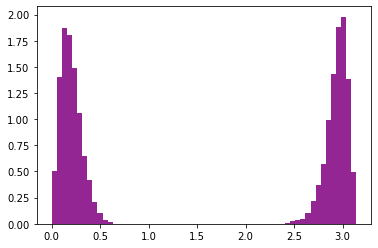

In [130]:
plt.hist(df_concated.theta, bins=60, color='purple', alpha=0.85, density=True);

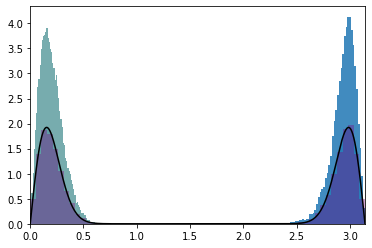

In [131]:
plt.fill_between(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=0.7)
plt.plot(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=1.0, color='k')
plt.hist(df.theta, bins=60, color='cadetblue', alpha=0.85, density=True)
plt.hist(df_right.theta, bins=60, alpha=.85, density=True)
plt.hist(df_concated.theta, bins=60, color='purple', alpha=0.35, density=True)
plt.xlim(0,np.pi);

In [132]:
df_concated.theta.mean()

1.5703974368172786

In [133]:
np.pi/2

1.5707963267948966

In [134]:
df_concated.theta.var()

1.8894834457296648

## Mean

In [137]:
theta_mean_y20 = integrate.simps(thetas * Y20(thetas,1,5.0*np.sqrt(2*D)/D)/NY20, thetas)

In [138]:
theta_mean_y20

1.5707963267948966

## Second moment

In [139]:
theta_2nd_m_y20 = integrate.simps(thetas**2 * Y20(thetas,1,5.0*np.sqrt(2*D)/D)/NY20, thetas)

## Variance

In [140]:
theta_var_y20 = integrate.simps((thetas - theta_mean_y20)**2 * Y20(thetas,1,5.0*np.sqrt(2*D)/D)/NY20, thetas)

In [141]:
theta_var_y20

1.8964435353362155

In [142]:
df_concated.theta.var()

1.8894834457296648

In [ ]:
C = np.sqrt(2*1e-1)
U0 = 5*C*1e0
D = 1e-1
dt = np.log(2)*1e-3
v0 = U0*dt

xpot3 = np.linspace(0,np.pi,100)
ypot3 = -0.5*np.sqrt((7/(4*np.pi)))*(5*np.cos(xpot3)**3 - 3*np.cos(xpot3))*U0

#const = v0*2*D*np.sqrt(5./(16*np.pi))
#p0_Y20 = (1./12300)*np.exp(const*(3*np.cos(theta2)**2 - 1))*np.sin(theta2)

coeff_pot_Y30 = (1*U0/D)*np.sqrt(7/(16*np.pi))
Norm = 1.584171e12

theta = np.linspace(0,np.pi,1000)
pot_Y30_int = (5)*np.cos(theta)**3 - (3)*np.cos(theta)



#p0_Y30_int = (1/185666)*np.exp(coeff_pot_Y30*pot_Y30_int)*np.sin(theta)


Norm3 = 181894
p0_Y30_int = (1/Norm3)*np.exp(coeff_pot_Y30*pot_Y30_int)*np.sin(theta)




ypot_Y30 = -U0*np.sqrt(7./(16*np.pi))*(5*np.cos(theta)**3 - 3*np.cos(theta))


def int_pot_y30(theta):
    return -U0*np.sqrt(7./(16*np.pi))*(5*np.cos(theta)**3 - 3*np.cos(theta))

In [233]:
cy30 = -np.sqrt((7./(16*np.pi)))
def Y30(theta,N,u0_gamma):
    return np.exp( - u0_gamma * cy30 * (5 * np.cos(theta)**3 - 3 * np.cos(theta))) * np.sin(theta) / N

In [384]:
the1 = 0
the2 = 0.9
the3 = 0.9
the4 = np.pi

In [385]:
theta_izq = np.linspace(the1, the2, 10000)
theta_der = np.linspace(the3, the4, 10000)

In [386]:
theta_izq.shape

(10000,)

In [387]:
theta_der.shape

(10000,)

In [388]:
NY30_izq = integrate.simps(Y30(theta_izq,1, 5.0*np.sqrt(2*D)/D), theta_izq)
NY30_der = integrate.simps(Y30(theta_der,1, 5.0*np.sqrt(2*D)/D), theta_der)

In [389]:
prop_izq = ( - np.cos(the2) + np.cos(the1))  /( ( - np.cos(the2) + np.cos(the1)) + ( - np.cos(the4) + np.cos(the3)) )
prop_der =  ( - np.cos(the4) + np.cos(the3)) / ( ( - np.cos(the2) + np.cos(the1)) + ( - np.cos(the4) + np.cos(the3)) )

In [390]:
PY30_izq = prop_izq * Y30(theta_izq,  NY30_izq, 5.0*np.sqrt(2*D)/D)
PY30_der =  prop_der * Y30(theta_der,  NY30_der, 5.0*np.sqrt(2*D)/D)


PY30_izq2 = Y30(theta_izq,  NY30_izq, 5.0*np.sqrt(2*D)/D)
PY30_der2 = Y30(theta_der,  NY30_der, 5.0*np.sqrt(2*D)/D)

In [391]:
display(prop_izq)
display(prop_der)


0.18919501586466775

0.8108049841353322

In [392]:
import seaborn as sns

In [393]:
mi_paletter = sns.color_palette('viridis_r',4)

In [394]:
D

0.1

In [395]:
dt

0.0006931471805599453

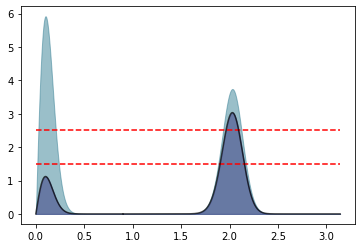

In [427]:
plt.fill_between(theta_izq, Y30(theta_izq, NY30_izq, 5.0*np.sqrt(2*D)/D), alpha=0.47, color=mi_paletter[2]);
plt.fill_between(theta_der, Y30(theta_der, NY30_der, 5.0*np.sqrt(2*D)/D), alpha=0.47, color=mi_paletter[2]);

plt.fill_between(theta_izq, Y30(theta_izq, (prop_izq** (-1)) * NY30_izq, 5.0*np.sqrt(2*D)/D), alpha=0.57, color=mi_paletter[3]);
plt.fill_between(theta_der, Y30(theta_der, (prop_der**(-1) ) * NY30_der, 5.0*np.sqrt(2*D)/D), alpha=0.57, color=mi_paletter[3]);

plt.plot(theta_izq, Y30(theta_izq, (prop_izq** (-1)) * NY30_izq, 5.0*np.sqrt(2*D)/D), alpha=0.7, color='k');
plt.plot(theta_der, Y30(theta_der, (prop_der**(-1) ) * NY30_der, 5.0*np.sqrt(2*D)/D), alpha=0.7, color='k');

plt.hlines(1.5,0,np.pi, color='r', linestyle='--')
plt.hlines(2.5,0,np.pi, color='r', linestyle='--')

In [255]:
prop_izq * NY30_izq + prop_der * NY30_der

18556.94124942485

In [265]:
integrate.simps(Y30(theta_izq,NY30_izq, 5.0*np.sqrt(2*D)/D), theta_izq)

1.0000000000000002

In [266]:
integrate.simps(Y30(theta_der, NY30_der, 5.0*np.sqrt(2*D)/D), theta_der)

0.9999999999999998

## Steps for the Analysis

 - Load left side ensemble
 - Load right side ensemble
 - Concat them on top of each other
 - Find the optimal point from where it is feasible to start sampling the stationary distribution
 - Calculate the mean
 - Calculate the variance
 - Calculate the third (center moment)
 - Calculate the fourth moment
 - Compare the differences between each one of these results against analytical solutions for the following escenarios:
  - Nmc = $10^{5}$
    - dt = $10^{-3}$
    - dt = $10^{-2}$
    - dt = $10^{-1}$
  - Nmc = $10^{6}$
    - dt = $10^{-3}$
    - dt = $10^{-2}$
    - dt = $10^{-1}$
  - Nmc = $10^{7}$
    - dt = $10^{-3}$
    - dt = $10^{-2}$
    - dt = $10^{-1}$
 - Calculate the Adam Fuller test on stationarity to investigate whether there is trend in the time series

# Analysis

## Loading the data

In [574]:
path = '/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/'

In [575]:
arr_mc7_dtm1_izq = np.loadtxt(path + 'MC1e7/dte-1/izq/Y20_Mean_Theta_t2.txt')
arr_mc7_dtm1_der = np.loadtxt(path + 'MC1e7/dte-1/der/Y20_Mean_Theta_t2.txt')
arr_mc7_dtm2_izq = np.loadtxt(path + 'MC1e7/dte-2/izq/Y20_Mean_Theta_t2.txt')
arr_mc7_dtm2_der = np.loadtxt(path + 'MC1e7/dte-2/der/Y20_Mean_Theta_t2.txt')
arr_mc7_dtm3_izq = np.loadtxt(path + 'MC1e7/dte-3/izq/Y20_Mean_Theta_t2.txt')
arr_mc7_dtm3_der = np.loadtxt(path + 'MC1e7/dte-3/der/Y20_Mean_Theta_t2.txt')


arr_mc6_dtm1_izq = np.loadtxt(path + 'MC1e6/dte-1/izq/Y20_Mean_Theta_t2.txt')
arr_mc6_dtm1_der = np.loadtxt(path + 'MC1e6/dte-1/der/Y20_Mean_Theta_t2.txt')
arr_mc6_dtm2_izq = np.loadtxt(path + 'MC1e6/dte-2/izq/Y20_Mean_Theta_t2.txt')
arr_mc6_dtm2_der = np.loadtxt(path + 'MC1e6/dte-2/der/Y20_Mean_Theta_t2.txt')
arr_mc6_dtm3_izq = np.loadtxt(path + 'MC1e6/dte-3/izq/Y20_Mean_Theta_t2.txt')
arr_mc6_dtm3_der = np.loadtxt(path + 'MC1e6/dte-3/der/Y20_Mean_Theta_t2.txt')


arr_mc5_dtm1_izq = np.loadtxt(path + 'MC1e5/dte-1/izq/Y20_Mean_Theta_t2.txt')
arr_mc5_dtm1_der = np.loadtxt(path + 'MC1e5/dte-1/der/Y20_Mean_Theta_t2.txt')
arr_mc5_dtm2_izq = np.loadtxt(path + 'MC1e5/dte-2/izq/Y20_Mean_Theta_t2.txt')
arr_mc5_dtm2_der = np.loadtxt(path + 'MC1e5/dte-2/der/Y20_Mean_Theta_t2.txt')
arr_mc5_dtm3_izq = np.loadtxt(path + 'MC1e5/dte-3/izq/Y20_Mean_Theta_t2.txt')
arr_mc5_dtm3_der = np.loadtxt(path + 'MC1e5/dte-3/der/Y20_Mean_Theta_t2.txt')



### Very Unusual escenario 

In [735]:
arr_mc6_dtm1_der = np.loadtxt(path + 'MC1e6/dte-1/der/Y20_Mean_Theta_t2.txt')

In [757]:
arr_mc7_dtm1_izq = np.loadtxt(path + 'MC1e7/dte-1/izq/Y20_Mean_Theta_t2.txt')

In [771]:
arr_mc7_dtm1_der = np.loadtxt(path + 'MC1e7/dte-1/der/Y20_Mean_Theta_t2.txt')

## Will make a list of tuples to iterate from

In [774]:
l_tuples = [(arr_mc7_dtm1_izq, arr_mc7_dtm1_der, 10), (arr_mc7_dtm2_izq, arr_mc7_dtm2_der, 100),
            (arr_mc7_dtm3_izq, arr_mc7_dtm3_der, 1000),(arr_mc6_dtm1_izq, arr_mc6_dtm1_der, 10),
            (arr_mc6_dtm2_izq, arr_mc6_dtm2_der, 100),(arr_mc6_dtm3_izq, arr_mc6_dtm3_der, 1000),
            (arr_mc5_dtm1_izq, arr_mc5_dtm1_der, 10), (arr_mc5_dtm2_izq, arr_mc5_dtm2_der, 100),
            (arr_mc5_dtm3_izq, arr_mc5_dtm3_der, 1000)]

## Constructiong the pandas data frames for time series analysis

In [648]:
display(arr_mc5_dtm1_izq.shape[0])
display(arr_mc6_dtm1_izq.shape[0])
display(arr_mc7_dtm1_izq.shape[0])

100001

1000001

10000001

### Generating the time stamps

In [614]:
suma = 0
tiempos = []
for i in range(arr_mc7_dtm3_izq.shape[0]):
    tiempos.append(suma)
    suma += dt
tiempos = np.array(tiempos)

In [615]:
mi_dict_test_i = {'tiempo': tiempos, 'theta': arr_mc7_dtm3_izq}
df_test_i = pd.DataFrame.from_dict(mi_dict_test_i)

mi_dict_test_d = {'tiempo': tiempos, 'theta': arr_mc7_dtm3_der}
df_test_d = pd.DataFrame.from_dict(mi_dict_test_d)

In [616]:
df_test_i.head()

,tiempo,theta
0,0.000000,0.000000
1,0.069315,0.006479
2,0.138629,0.028592
3,0.207944,0.007735
4,0.277259,0.020590


In [617]:
df_test_i.set_index("tiempo", inplace=True)

In [618]:
df_test_d.head()

,tiempo,theta
0,0.000000,3.141593
1,0.069315,3.141198
2,0.138629,3.138581
3,0.207944,3.125966
4,0.277259,3.134456


In [619]:
df_test_d.set_index("tiempo", inplace=True)

<AxesSubplot:xlabel='tiempo'>

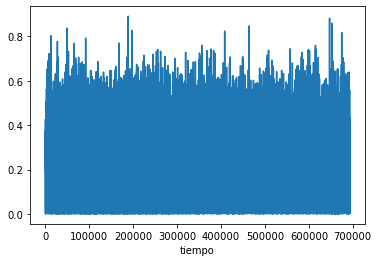

In [620]:
df_test_i.theta.plot()

<AxesSubplot:xlabel='tiempo'>

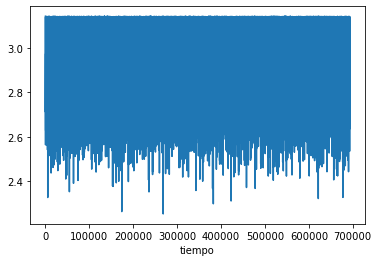

In [621]:
df_test_d.theta.plot()

In [622]:
df_test_i.theta.mean()

0.19751965084141251

In [623]:
df_test_d.theta.mean()

2.943829370086938

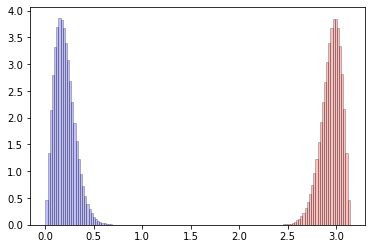

In [624]:
_ = plt.hist(df_test_i.theta, bins=40, density=True, edgecolor='k', color='b', alpha=0.25)
_ = plt.hist(df_test_d.theta, bins=40, density=True, edgecolor='k', color='r', alpha=0.25)

In [625]:
df_mc5_dtm1_concat = pd.concat([df_test_i, df_test_d])

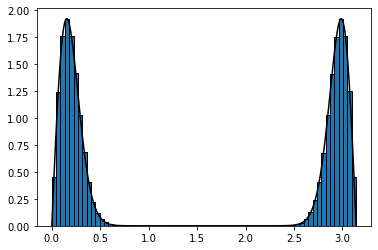

In [626]:
_ = plt.hist(df_mc5_dtm1_concat.theta, bins=70, density=True, edgecolor='k')
_ = plt.plot(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=1.0, color='k')

In [627]:
df_mc5_dtm1_concat.theta.mean()

1.570674510464309

In [628]:
np.pi/2

1.5707963267948966

In [629]:
df_mc5_dtm1_concat.theta.mean() - np.pi/2

-0.00012181633058760966

In [630]:
df_mc5_dtm1_concat.theta.var()

1.8967762349655781

In [631]:
theta_var_theo = 1.8964435353362155

In [632]:
df_mc5_dtm1_concat.theta.var() - theta_var_theo

0.00033269962936266495

In [633]:
df_mc5_dtm1_concat['third_m'] = df_mc5_dtm1_concat.theta**3

In [634]:
df_mc5_dtm1_concat['fourth_m'] = df_mc5_dtm1_concat.theta**4

In [636]:
df_mc5_dtm1_concat.third_m.mean()

12.81281228727051

In [637]:
theta_third_m_theo = 12.812564202877644

In [638]:
theta_third_m_theo - df_mc5_dtm1_concat.third_m.mean()

-0.00024808439286694295

In [639]:
df_mc5_dtm1_concat.fourth_m.mean()

37.84211482822563

In [640]:
theta_fourth_m_theo = 37.84008818710703

In [641]:
theta_fourth_m_theo - df_mc5_dtm1_concat.fourth_m.mean()

-0.0020266411186042887

In [644]:
# Run ADF test on the differenced time series
#result = adfuller(df_mc5_dtm1_concat['theta'])

# Plot the differenced time series
#fig, ax = plt.subplots()
#df_stationary.plot(ax=ax)
#plt.show()

# Print the test statistic and the p-value
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

In [646]:
len(l_tuples)

9

In [653]:
def fun_time(arr):
    suma = 0
    tiempos = []
    for i in range(arr.shape[0]):
        tiempos.append(suma)
        suma += dt
    tiempos = np.array(tiempos)
    return tiempos

In [652]:
l_tuples[0][0][1000:].shape

(9999001,)

In [775]:
l_diff_1 = []
l_diff_2 = []
l_diff_3 = []
l_diff_4 = []

for arr_izq, arr_der, start_step in l_tuples:
    
    fig = plt.figure()
    
    tiempos = fun_time(arr_izq[start_step:])
    
    mi_dict_i = {'tiempo': tiempos, 'theta': arr_izq[start_step:]}
    df_i = pd.DataFrame.from_dict(mi_dict_i)

    mi_dict_d = {'tiempo': tiempos, 'theta': arr_der[start_step:]}
    df_d = pd.DataFrame.from_dict(mi_dict_d)
    
    df_i.set_index("tiempo", inplace=True)
    df_d.set_index("tiempo", inplace=True)
    
    
    #_ = plt.hist(df_i.theta, bins=40, density=True, edgecolor='k', color='b', alpha=0.25)
    #_ = plt.hist(df_d.theta, bins=40, density=True, edgecolor='k', color='r', alpha=0.25)
    
    df_mc_dt_concat = pd.concat([df_i, df_d])
    
    #_ = plt.hist(df_mc_dt_concat.theta, bins=70, density=True, edgecolor='k')
    #_ = plt.plot(thetas, Y20(thetas, NY20, 5.0*np.sqrt(2*D)/D), alpha=1.0, color='k')
    
    df_mc_dt_concat['third_m'] = df_mc_dt_concat.theta**3
    df_mc_dt_concat['fourth_m'] = df_mc_dt_concat.theta**4
    
    

    diff_1st_M = df_mc_dt_concat.theta.mean() - np.pi/2
    diff_var = df_mc_dt_concat.theta.var() - theta_var_theo
    diff_third_M = theta_third_m_theo - df_mc_dt_concat.third_m.mean()
    diff_fourth_M = theta_fourth_m_theo - df_mc_dt_concat.fourth_m.mean()
    
    l_diff_1.append(diff_1st_M)
    l_diff_2.append(diff_var)
    l_diff_3.append(diff_third_M)
    l_diff_4.append(diff_fourth_M)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [776]:
display(l_diff_1)
display(l_diff_2)
display(l_diff_3)
display(l_diff_4)

[-0.022595361964953486,
 0.00016488714498419377,
 -0.00011965598557117652,
 0.0001992066964833228,
 0.0002946028533210576,
 0.00200937676100188,
 0.00023389515291860619,
 0.0012726374235243476,
 -0.004695256740307796]

[-0.045378271697870565,
 -0.0042573436552824084,
 0.00032854088628853084,
 -0.04403951120215677,
 -0.003656134255434207,
 6.26546070978673e-05,
 -0.04431942455129345,
 -0.0009196462670992833,
 0.020845305354747712]

[0.42125352923465975,
 0.017978319281187538,
 -0.0002565252517552352,
 0.20511036041173014,
 0.013921170310483788,
 -0.026440275308532435,
 0.20625998791406808,
 -0.012039164642933642,
 -0.03900636805524549]

[1.4174842876598035,
 0.06861797326764929,
 -0.0020585929521601543,
 0.7755608278774275,
 0.05473884472693413,
 -0.10378677944717651,
 0.7810795366381456,
 -0.04887406922045301,
 -0.15098841520076434]

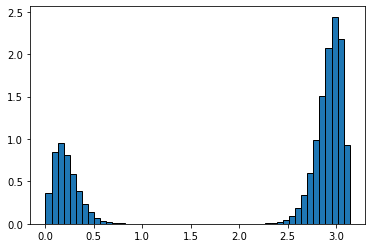

In [756]:
#_=plt.hist(arr_mc6_dtm1_izq, bins=50, density=True, edgecolor='k')
_=plt.hist(arr_mc7_dtm1_izq, bins=50, density=True, edgecolor='k')

### what a fuck!?

### Reprocessed

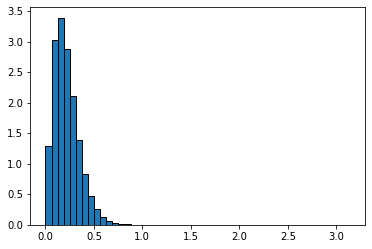

In [773]:
#_=plt.hist(arr_mc6_dtm1_izq, bins=50, density=True, edgecolor='k')
_=plt.hist(arr_mc7_dtm1_izq, bins=50, density=True, edgecolor='k')

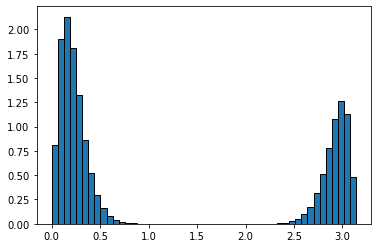

In [759]:
_=plt.hist(arr_mc7_dtm1_der, bins=50, density=True, edgecolor='k')

### what the fuck!

In [766]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1/der'

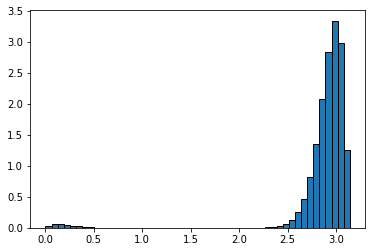

In [772]:
_=plt.hist(arr_mc7_dtm1_der, bins=50, density=True, edgecolor='k')

In [779]:
display(len(l_diff_1))
display(len(l_diff_2))
display(len(l_diff_3))
display(len(l_diff_4))

9

9

9

9

## Gather

In [ ]:
l_tuples = [(arr_mc7_dtm1_izq, arr_mc7_dtm1_der, 10), (arr_mc7_dtm2_izq, arr_mc7_dtm2_der, 100),
            (arr_mc7_dtm3_izq, arr_mc7_dtm3_der, 1000),(arr_mc6_dtm1_izq, arr_mc6_dtm1_der, 10),
            (arr_mc6_dtm2_izq, arr_mc6_dtm2_der, 100),(arr_mc6_dtm3_izq, arr_mc6_dtm3_der, 1000),
            (arr_mc5_dtm1_izq, arr_mc5_dtm1_der, 10), (arr_mc5_dtm2_izq, arr_mc5_dtm2_der, 100),
            (arr_mc5_dtm3_izq, arr_mc5_dtm3_der, 1000)]

In [784]:
dict_join ={'O(Stat_Ens)':[7,7,7,6,6,6,5,5,5], 'O(dt)':[-1,-2,-3,-1,-2,-3,-1,-2,-3], 'Mean_diff':l_diff_1, 
            'Var_diff':l_diff_2,'Third_md':l_diff_3, 'Fourth':l_diff_4}

In [785]:
df_diffs = pd.DataFrame.from_dict(dict_join)

In [786]:
df_diffs

,O(Stat_Ens),O(dt),Mean_diff,Var_diff,Third_md,Fourth
0,7,-1,-0.022595,-0.045378,0.421254,1.417484
1,7,-2,0.000165,-0.004257,0.017978,0.068618
2,7,-3,-0.000120,0.000329,-0.000257,-0.002059
3,6,-1,0.000199,-0.044040,0.205110,0.775561
4,6,-2,0.000295,-0.003656,0.013921,0.054739
5,6,-3,0.002009,0.000063,-0.026440,-0.103787
6,5,-1,0.000234,-0.044319,0.206260,0.781080
7,5,-2,0.001273,-0.000920,-0.012039,-0.048874
8,5,-3,-0.004695,0.020845,-0.039006,-0.150988


In [787]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Single_Particle_Sim/MC1e7/dte-1/der'

In [788]:
df_diffs.to_csv("/Users/adrianovaldesgomez/Desktop/StatAnalys_SingP_01.csv")